# Inferencia Estadística 2

Los test de hipótesis son la base de la inferencia estadística. Estos permiten afirmar o rechazar las hipótesis planteadas por investigadores. En este notebook encontrarán el primer test de hipótesis que veremos en el curso, el z-test.

Para abrirlo en Google colab:  <a target="_blank" href="https://githubtocolab.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/Clases/Clase6_InferenciaEstadistica_II.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


In [1]:
# Requerimientos
!pip install seaborn -q # Para visualización y datasets
!pip install scipy -q # Para analísis estadísticos
!pip install numpy -q # Para cálculos científicos
!pip install pandas -q # Para almacenamiento y trabajo con datos
!pip install matplotlib -q # Para visualización
!pip install statsmodels -q # Para analísis estadísticos
!pip install rdatasets -q # Para datasets de R

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 MB 8.1 MB/s eta 0:00:00


## Test de Hipótesis

Los Test de Hipótesis permiten determinar, con cierto nivel de confianza, si una determinada hipótesis (valga la redundancia) es real o falsa. En este caso, es posible utilizar intervalos de confianza para la prueba.

En el caso planteado del Dr. Nullsheimer vs Altshuler:

In [2]:
import numpy as np
import scipy.stats as st
n = 500
prom_muestral = 48
des_est = 15.3

err_std = np.round(des_est / np.sqrt(n), 1) # redondeamos
print(f'Error estándar: {err_std}') #0.7

z_critico = st.norm.ppf(0.975) # 1-alpha/2
corte_inferior = prom_muestral - z_critico * err_std
corte_superior = prom_muestral + z_critico * err_std
print(f'Corte Inferior: {corte_inferior:.2f}') # 46.63
print(f'Corte Superior: {corte_superior:.2f}') # 49.37
print(f'Valor Nulo: 50')

Error estándar: 0.7
Corte Inferior: 46.63
Corte Superior: 49.37
Valor Nulo: 50


Dado a que el valor nulo $\mu_1 = 50$ no se encuentra en el intervalo se rechaza la hipótesis nula.

## Caso de Estudio: Horas de Sueño

In [4]:
# data set artificial
np.random.seed(11)
horas_sueno = np.random.beta(3.5, 10, 100) *8 + 5

Promedio Muestra 7.199804783285405
Desviación Estandar Muestra 0.9968078354737273
Error Estándar Muestra 0.09968078354737273


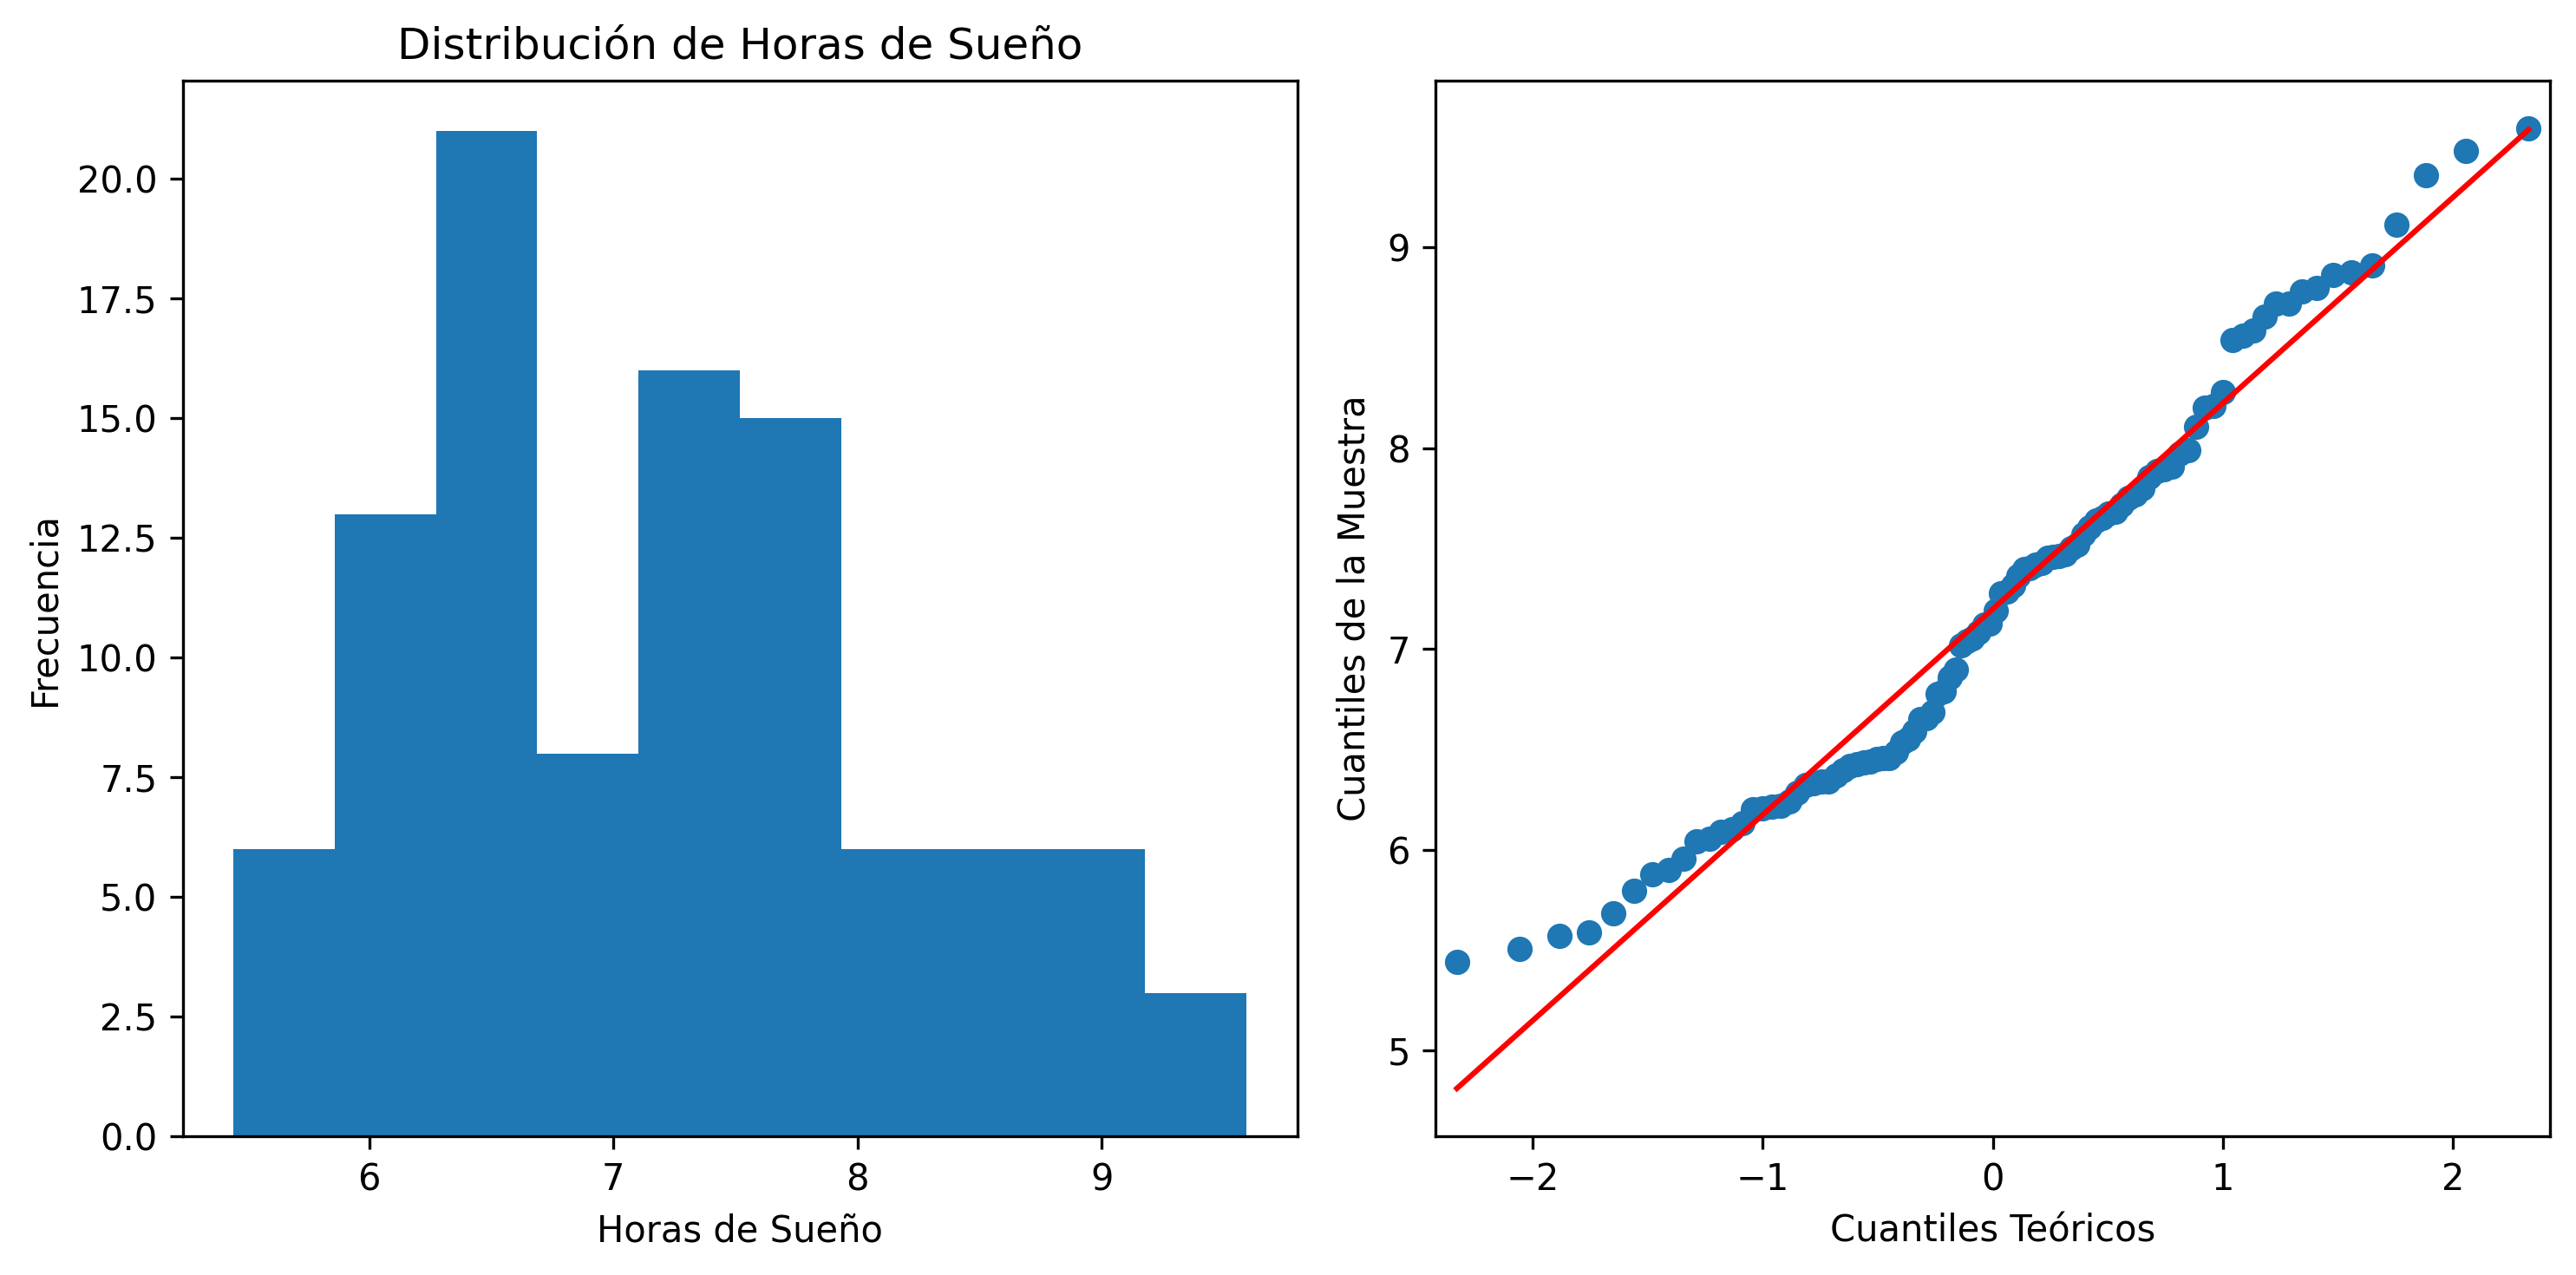

Valor Z: 2.0044463554045877
Valor P: 0.02251113395668669
Dado a que 0.023 < 0.05, rechazamos la hipótesis nula a un 5% nivel de confianza.


In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Realizamos un test de hipotesis
# Hipotesis
# H0: mu = 7
# Ha: mu > 7

# Calculamos el estimador puntual (promedio y error estandar)
alpha = 0.05
n = horas_sueno.shape[0] # 100
prom_muestra = np.mean(horas_sueno) # 7.1998
sd_muestra = np.std(horas_sueno) # 0.9968
se_muestra = sd_muestra / np.sqrt(n) # 0.09968
print('Promedio Muestra', prom_muestra)
print('Desviación Estandar Muestra', sd_muestra)
print('Error Estándar Muestra', se_muestra)

# Independencia: Dado que fue una muestra aleatorioa y menor al 10% de la población
# Podemos asumir independencia
# Normalidad: Se puede ver en el siguiente gráfico

fig, ax = plt.subplots(1,2, figsize=(10,5), dpi = 300)
sm.qqplot(horas_sueno, line='r', ax=ax[1])
ax[1].set_xlabel('Cuantiles Teóricos')
ax[1].set_ylabel('Cuantiles de la Muestra')
ax[0].hist(horas_sueno, bins = 10)
ax[0].set_title('Distribución de Horas de Sueño')
ax[0].set_xlabel('Horas de Sueño')
ax[0].set_ylabel('Frecuencia')
fig.tight_layout()
plt.show()

###
# Los datos muestran se muestran levemente asimétricos, pero
# dado el número de datos (100), es suficientemente grande (n>30)
# podemos asumir normalidad
###

# Prueba estadística
valorz = (prom_muestra - 7)/se_muestra # 2.004446
valorp = 1-st.norm.cdf(valorz, loc = 0, scale = 1) #  0.02251
valorp < alpha
print(f'Valor Z: {valorz}')
print(f'Valor P: {valorp}')
print(f'Dado a que {valorp:.3f} < {alpha}, rechazamos la hipótesis nula a un 5% nivel de confianza.')

### Pruebas estadísticas con Python

Python, específicamente `scipy.stats` permite realizar pruebas estadísticas de forma sencilla e intuitiva. Para esto, pueden encontrar todas las pruebas estadísticas disponibles:
- https://docs.scipy.org/doc/scipy/reference/stats.html#hypothesis-tests-and-related-functions

Dependiendo del tipo de prueba que se quiera probar, diferentes test van a servir. Dentro de estas documentaciones podrán encontrar los supuestos y casos en donde pueden utilizar cada una.